In [1]:
import numpy as np
import pandas as pd
import datetime

In [2]:
import matplotlib
import matplotlib.pyplot as plt

# Check Middle Arrival Time Mape

In [3]:
# test 

In [4]:
validation_path = '../../data/offline/validation_9_6/'
#validation_path = '../../data/offline/validation_9_20/'
#validation_path = '../../data/offline/validation_10_11/'

In [6]:
link_id = 117

In [7]:
X_test_middle_morning_time_df = pd.read_csv(validation_path + 'feature/feature1/morning/X_src_test_link' + str(link_id) + '.csv', index_col=0)
y_test_middle_morning_time_df = pd.read_csv(validation_path + 'feature/feature1/morning/y_test_link' + str(link_id) + '.csv', index_col=0)
y_predict_middle_morning_time_df = pd.read_csv(validation_path + 'prediction/feature1/morning/' + str(link_id) + '.csv', index_col=0)

X_test_middle_afternoon_time_df = pd.read_csv(validation_path + 'feature/feature1/afternoon/X_src_test_link' + str(link_id) + '.csv', index_col=0)
y_test_middle_afternoon_time_df = pd.read_csv(validation_path + 'feature/feature1/afternoon/y_test_link' + str(link_id) + '.csv', index_col=0)
y_predict_middle_afternoon_time_df = pd.read_csv(validation_path + 'prediction/feature1/afternoon/' + str(link_id) + '.csv', index_col=0)

In [8]:
X_test_residual_morning_time_df = pd.read_csv(validation_path + 'feature/feature2/morning/X_src_test_link' + str(link_id) + '.csv', index_col=0)
y_test_residual_morning_time_df = pd.read_csv(validation_path + 'feature/feature2/morning/y_test_link' + str(link_id) + '.csv', index_col=0)
y_predict_residual_morning_time_df = pd.read_csv(validation_path + 'prediction/feature2/morning/' + str(link_id) + '.csv', index_col=0)

X_test_residual_afternoon_time_df = pd.read_csv(validation_path + 'feature/feature2/afternoon/X_src_test_link' + str(link_id) + '.csv', index_col=0)
y_test_residual_afternoon_time_df = pd.read_csv(validation_path + 'feature/feature2/afternoon/y_test_link' + str(link_id) + '.csv', index_col=0)
y_predict_residual_afternoon_time_df = pd.read_csv(validation_path + 'prediction/feature2/afternoon/' + str(link_id) + '.csv', index_col=0)

In [9]:
def ArrayMape(ground_truth, predictions):
    diff = (ground_truth - predictions) / ground_truth
    diff = np.abs(diff)
    mape = diff.sum() / ground_truth.size
    
    return mape

In [10]:
ArrayMape(y_test_middle_morning_time_df.loc[0] + y_test_residual_morning_time_df.loc[0], 
          y_predict_middle_morning_time_df.loc[0] + y_predict_residual_morning_time_df.loc[0])

0.33965500159557477

mape:0.264066


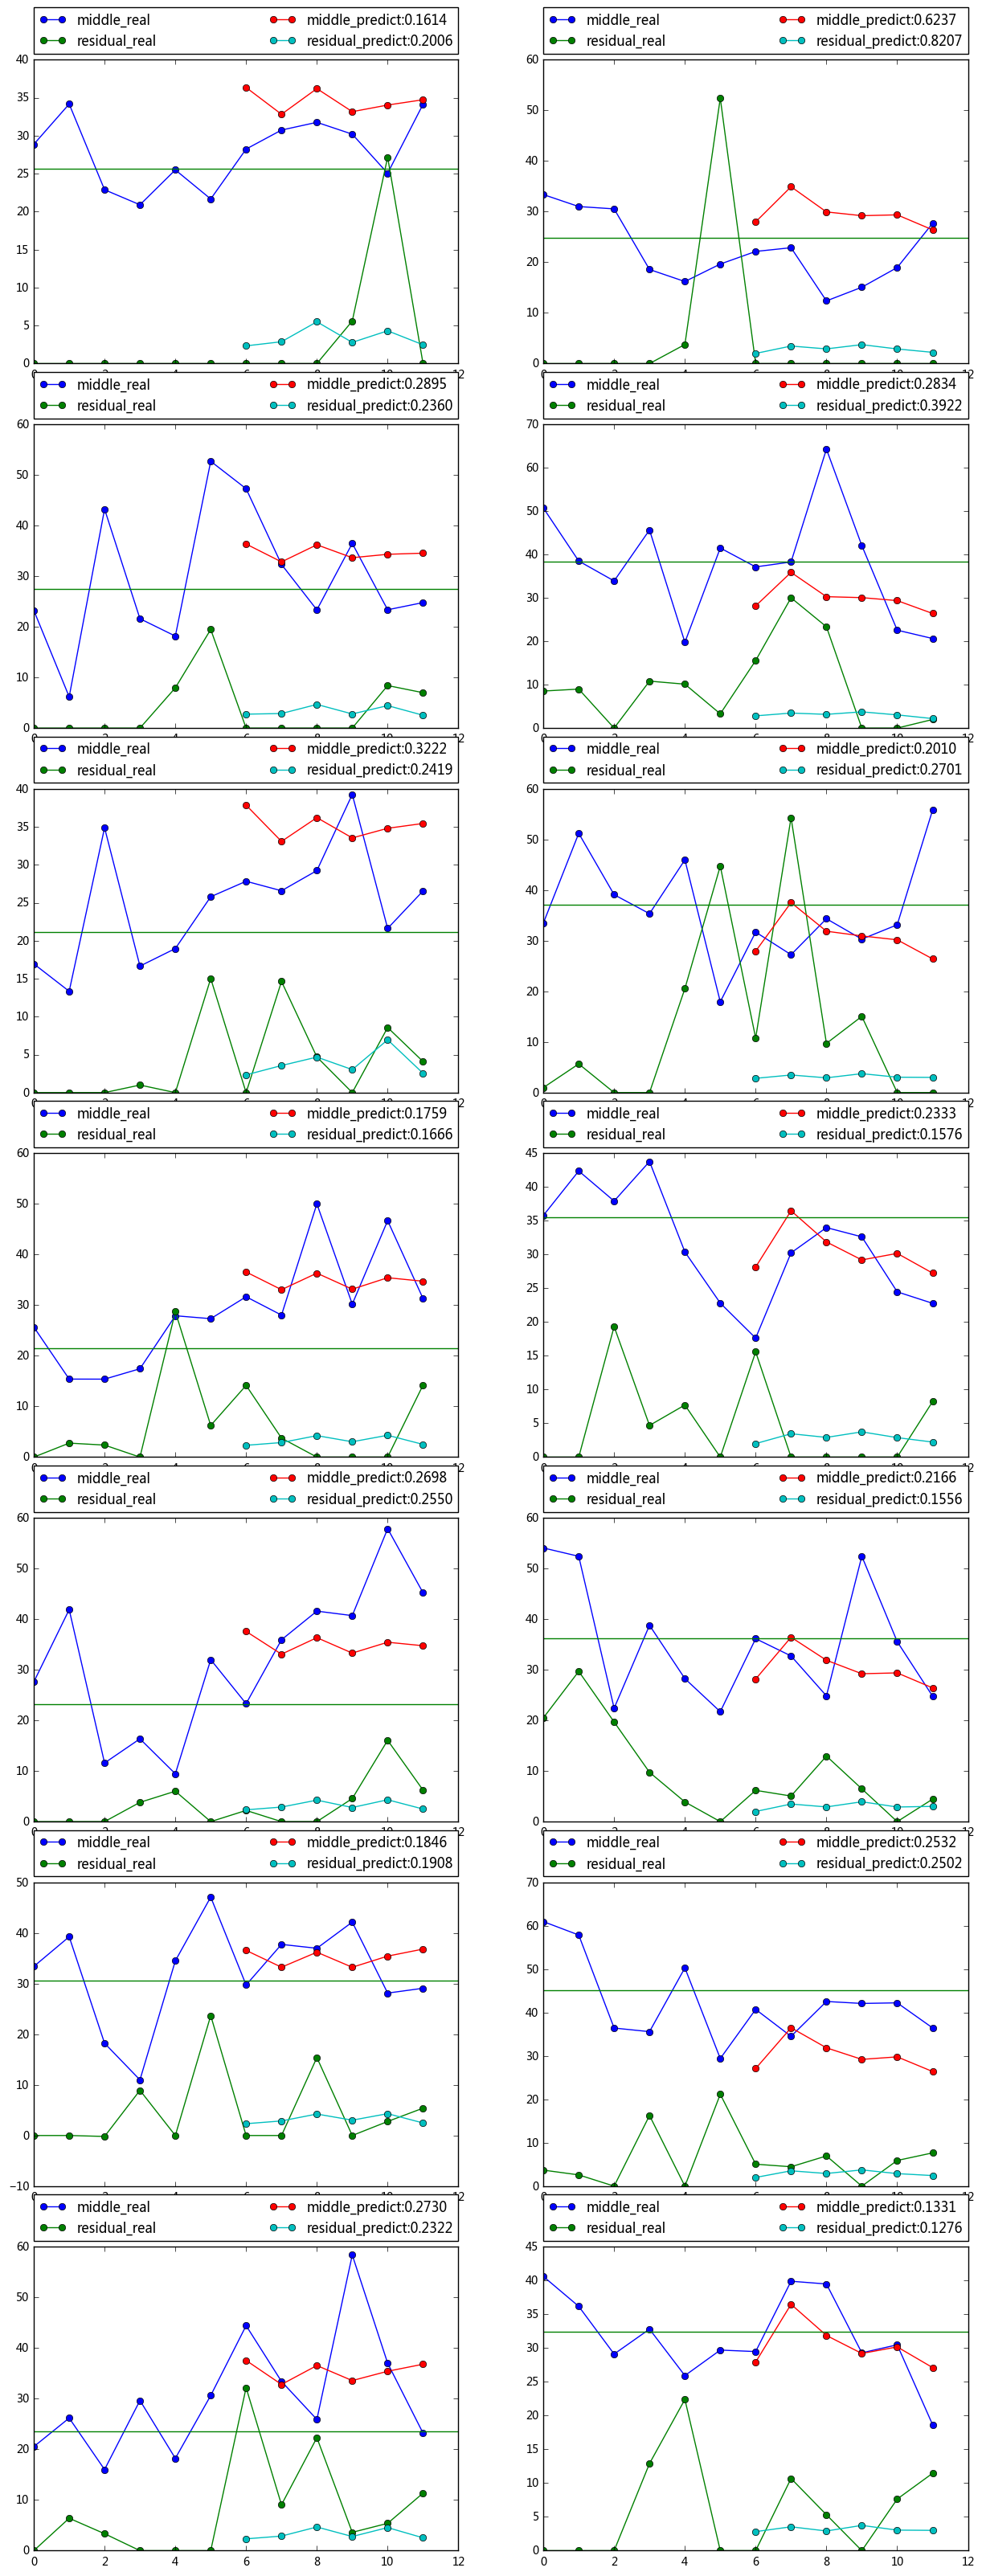

In [11]:
middle_morning_time_df = pd.merge(X_test_middle_morning_time_df, y_test_middle_morning_time_df, left_index=True, right_index=True)
middle_afternoon_time_df = pd.merge(X_test_middle_afternoon_time_df, y_test_middle_afternoon_time_df, left_index=True, right_index=True)

residual_morning_time_df = pd.merge(X_test_residual_morning_time_df, y_test_residual_morning_time_df, left_index=True, right_index=True)
residual_afternoon_time_df = pd.merge(X_test_residual_afternoon_time_df, y_test_residual_afternoon_time_df, left_index=True, right_index=True)

days = 7
fig, axes = plt.subplots(nrows=days, ncols=2, figsize=(15, 40))
mape = 0
for d in range(days):
    for t in range(2):
        if t == 0:
            middle_mape = ArrayMape(y_test_middle_morning_time_df.loc[d], y_predict_middle_morning_time_df.loc[d])
            residual_mape = ArrayMape(y_test_middle_morning_time_df.loc[d] + y_test_residual_morning_time_df.loc[d], 
                                      y_predict_middle_morning_time_df.loc[d] + y_predict_residual_morning_time_df.loc[d]  / 3)
            axes[d][t].plot(middle_morning_time_df.loc[d].reset_index(drop =True).index, middle_morning_time_df.loc[d].reset_index(drop =True), 'o-', label='middle_real')
            axes[d][t].plot(residual_morning_time_df.loc[d].reset_index(drop =True).index, residual_morning_time_df.loc[d].reset_index(drop =True), 'o-', label='residual_real')
            axes[d][t].plot(np.array(range(6, 12)), y_predict_middle_morning_time_df.loc[d].values, 'o-', label='middle_predict:%0.4f'%(middle_mape))
            axes[d][t].plot(np.array(range(6, 12)), y_predict_residual_morning_time_df.loc[d].values / 3, 'o-', label='residual_predict:%0.4f'%(residual_mape))
            axes[d][t].axhline(X_test_middle_morning_time_df.loc[d].mean(), color='g')
        else:
            middle_mape = ArrayMape(y_test_middle_afternoon_time_df.loc[d], y_predict_middle_afternoon_time_df.loc[d])
            residual_mape = ArrayMape(y_test_middle_afternoon_time_df.loc[d] + y_test_residual_afternoon_time_df.loc[d], 
                                      y_predict_middle_afternoon_time_df.loc[d] + y_predict_residual_afternoon_time_df.loc[d] / 1.5)
            
            axes[d][t].plot(middle_afternoon_time_df.loc[d].reset_index(drop =True).index, middle_afternoon_time_df.loc[d].reset_index(drop =True), 'o-', label='middle_real')
            axes[d][t].plot(residual_afternoon_time_df.loc[d].reset_index(drop =True).index, residual_afternoon_time_df.loc[d].reset_index(drop =True), 'o-', label='residual_real')
            axes[d][t].plot(np.array(range(6, 12)), y_predict_middle_afternoon_time_df.loc[d].values, 'o-', label='middle_predict:%0.4f'%(middle_mape))
            axes[d][t].plot(np.array(range(6, 12)), y_predict_residual_afternoon_time_df.loc[d].values / 2, 'o-', label='residual_predict:%0.4f'%(residual_mape))
            axes[d][t].axhline(X_test_middle_afternoon_time_df.loc[d].mean(), color='g')
        mape = mape + residual_mape
        axes[d][t].legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)

print("mape:%f"%(mape/14))
plt.show()

        